# Exploratory Data Analysis (Krasnoyarsk Real Estate project)

<a id="0"></a> <br>
## Table of Contents  
1. [Introduction](#1)     
    1. [Problem Definition](#2) 
    1. [Data description](#3)
1. [Data Understanding](#4)
1. [Data Preparation](#5)    
1. [Feature Understanding and Feature Relationships](#6)  
    1. [Correlation between premises_area, floor, floor_tot, price](#7)        
    1. [Flat type](#8)      
    1. [City area](#9)    
    1. [Premises area](#10)  
    1. [Floor](#11)     
    1. [Layout](#12)     
    1. [Construction status](#13)     
1. [Apartments under construction](#14) 
    1. [City areas](#15)     
    1. [Flat types](#16)            
    1. [Best prices for 2-room apartment](#17) 
    1. [2-room apartment distribution in different city arias](#18)     
1. [Summary](#19)
1. [References](#20)

## 1. Introduction <a id="1"></a>
The real estate market is an important aspect of any city's economy, and Krasnoyarsk city is no exception. With a growing population and a thriving economy, the city has seen an increase in the number of real estate properties being bought and sold in recent years. As a result, it is crucial to have a clear understanding of the real estate market in Krasnoyarsk city.

### A. Problem Definition <a id="2"></a>

The problem addressed in this exploratory data analysis project is to understand the distribution of flats with different parameters in Krasnoyarsk city, with the goal of gaining insights into the real estate market in the city. The project aims to compare various parameters of flats such as size, location, number of rooms, price, and to identify patterns and trends in their distribution across different areas of the city. By analyzing these patterns and trends, the project seeks to provide valuable information that can assist real estate investors, property developers, and other stakeholders in making informed decisions regarding the purchase, sale, and development of real estate properties in Krasnoyarsk. 

### B. Data description <a id="3"></a>

To gain insights into the real estate market, we have collected a data set containing information about the sale of apartments in Krasnoyarsk. The data set includes various parameters such as the type of apartment - "flat_type", the district of the apartment (square meters) - "city_area", the apartment area - "premises_area", the floor of the apartment - "floor", total number of storeys of the building - "floor_tot", the layout - "layout", the building construction status - "status", and the price (euro) - "price". <br>
<br>
The data was taken from a site for the sale of real estate: https://arevera.ru/apartments/ <br>
Parsing code: https://github.com/vvalmispild/Krasnoyarsk_Real_Estate_project/blob/main/scraper_real_estate.ipynb <br>
Data cleaning code: https://github.com/vvalmispild/Krasnoyarsk_Real_Estate_project/blob/main/data_cleaning.ipynb


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
# Loading the data
df = pd.read_csv("./flats_info_cleaned.csv", delimiter=',')

## 2. Data Understanding <a id="4"></a>

In [3]:
# Structure of the dataset
df.head()

,flat_type,city_area,premises_area,floor,floor_tot,layout,status,price
0,1_room_ap,Sovietskiy,29.7,1,9,new,finished,38837.209302
1,3_room_ap,Sovietskiy,64.1,2,9,new,finished,75581.395349
2,3_room_ap,Sverdlovsky,58.4,1,5,khrushchevka,finished,58023.255814
3,3_room_ap,Sverdlovsky,92.3,5,6,new,finished,144186.046512
4,2_room_ap,Oktyabrskiy,48.0,10,17,new,finished,50000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   flat_type      2207 non-null   object 
 1   city_area      2207 non-null   object 
 2   premises_area  2207 non-null   float64
 3   floor          2207 non-null   int64  
 4   floor_tot      2207 non-null   int64  
 5   layout         2207 non-null   object 
 6   status         2207 non-null   object 
 7   price          2207 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 138.1+ KB


Data dosn't have non-null values. The data types of each column match the actual data and already prepared for analysis.

In [5]:
# Descriptive statistics of numerical data
df.describe()

,premises_area,floor,floor_tot,price
count,2207.000000,2207.000000,2207.000000,2207.000000
mean,53.696144,7.168101,13.692796,66350.143781
std,22.582207,4.958698,6.016060,33064.214542
min,9.300000,1.000000,2.000000,4651.162791
25%,38.300000,3.000000,9.000000,46511.627907
50%,52.000000,6.000000,15.000000,60465.116279
75%,64.730000,10.000000,18.000000,78427.906977
max,176.200000,25.000000,26.000000,395348.837209


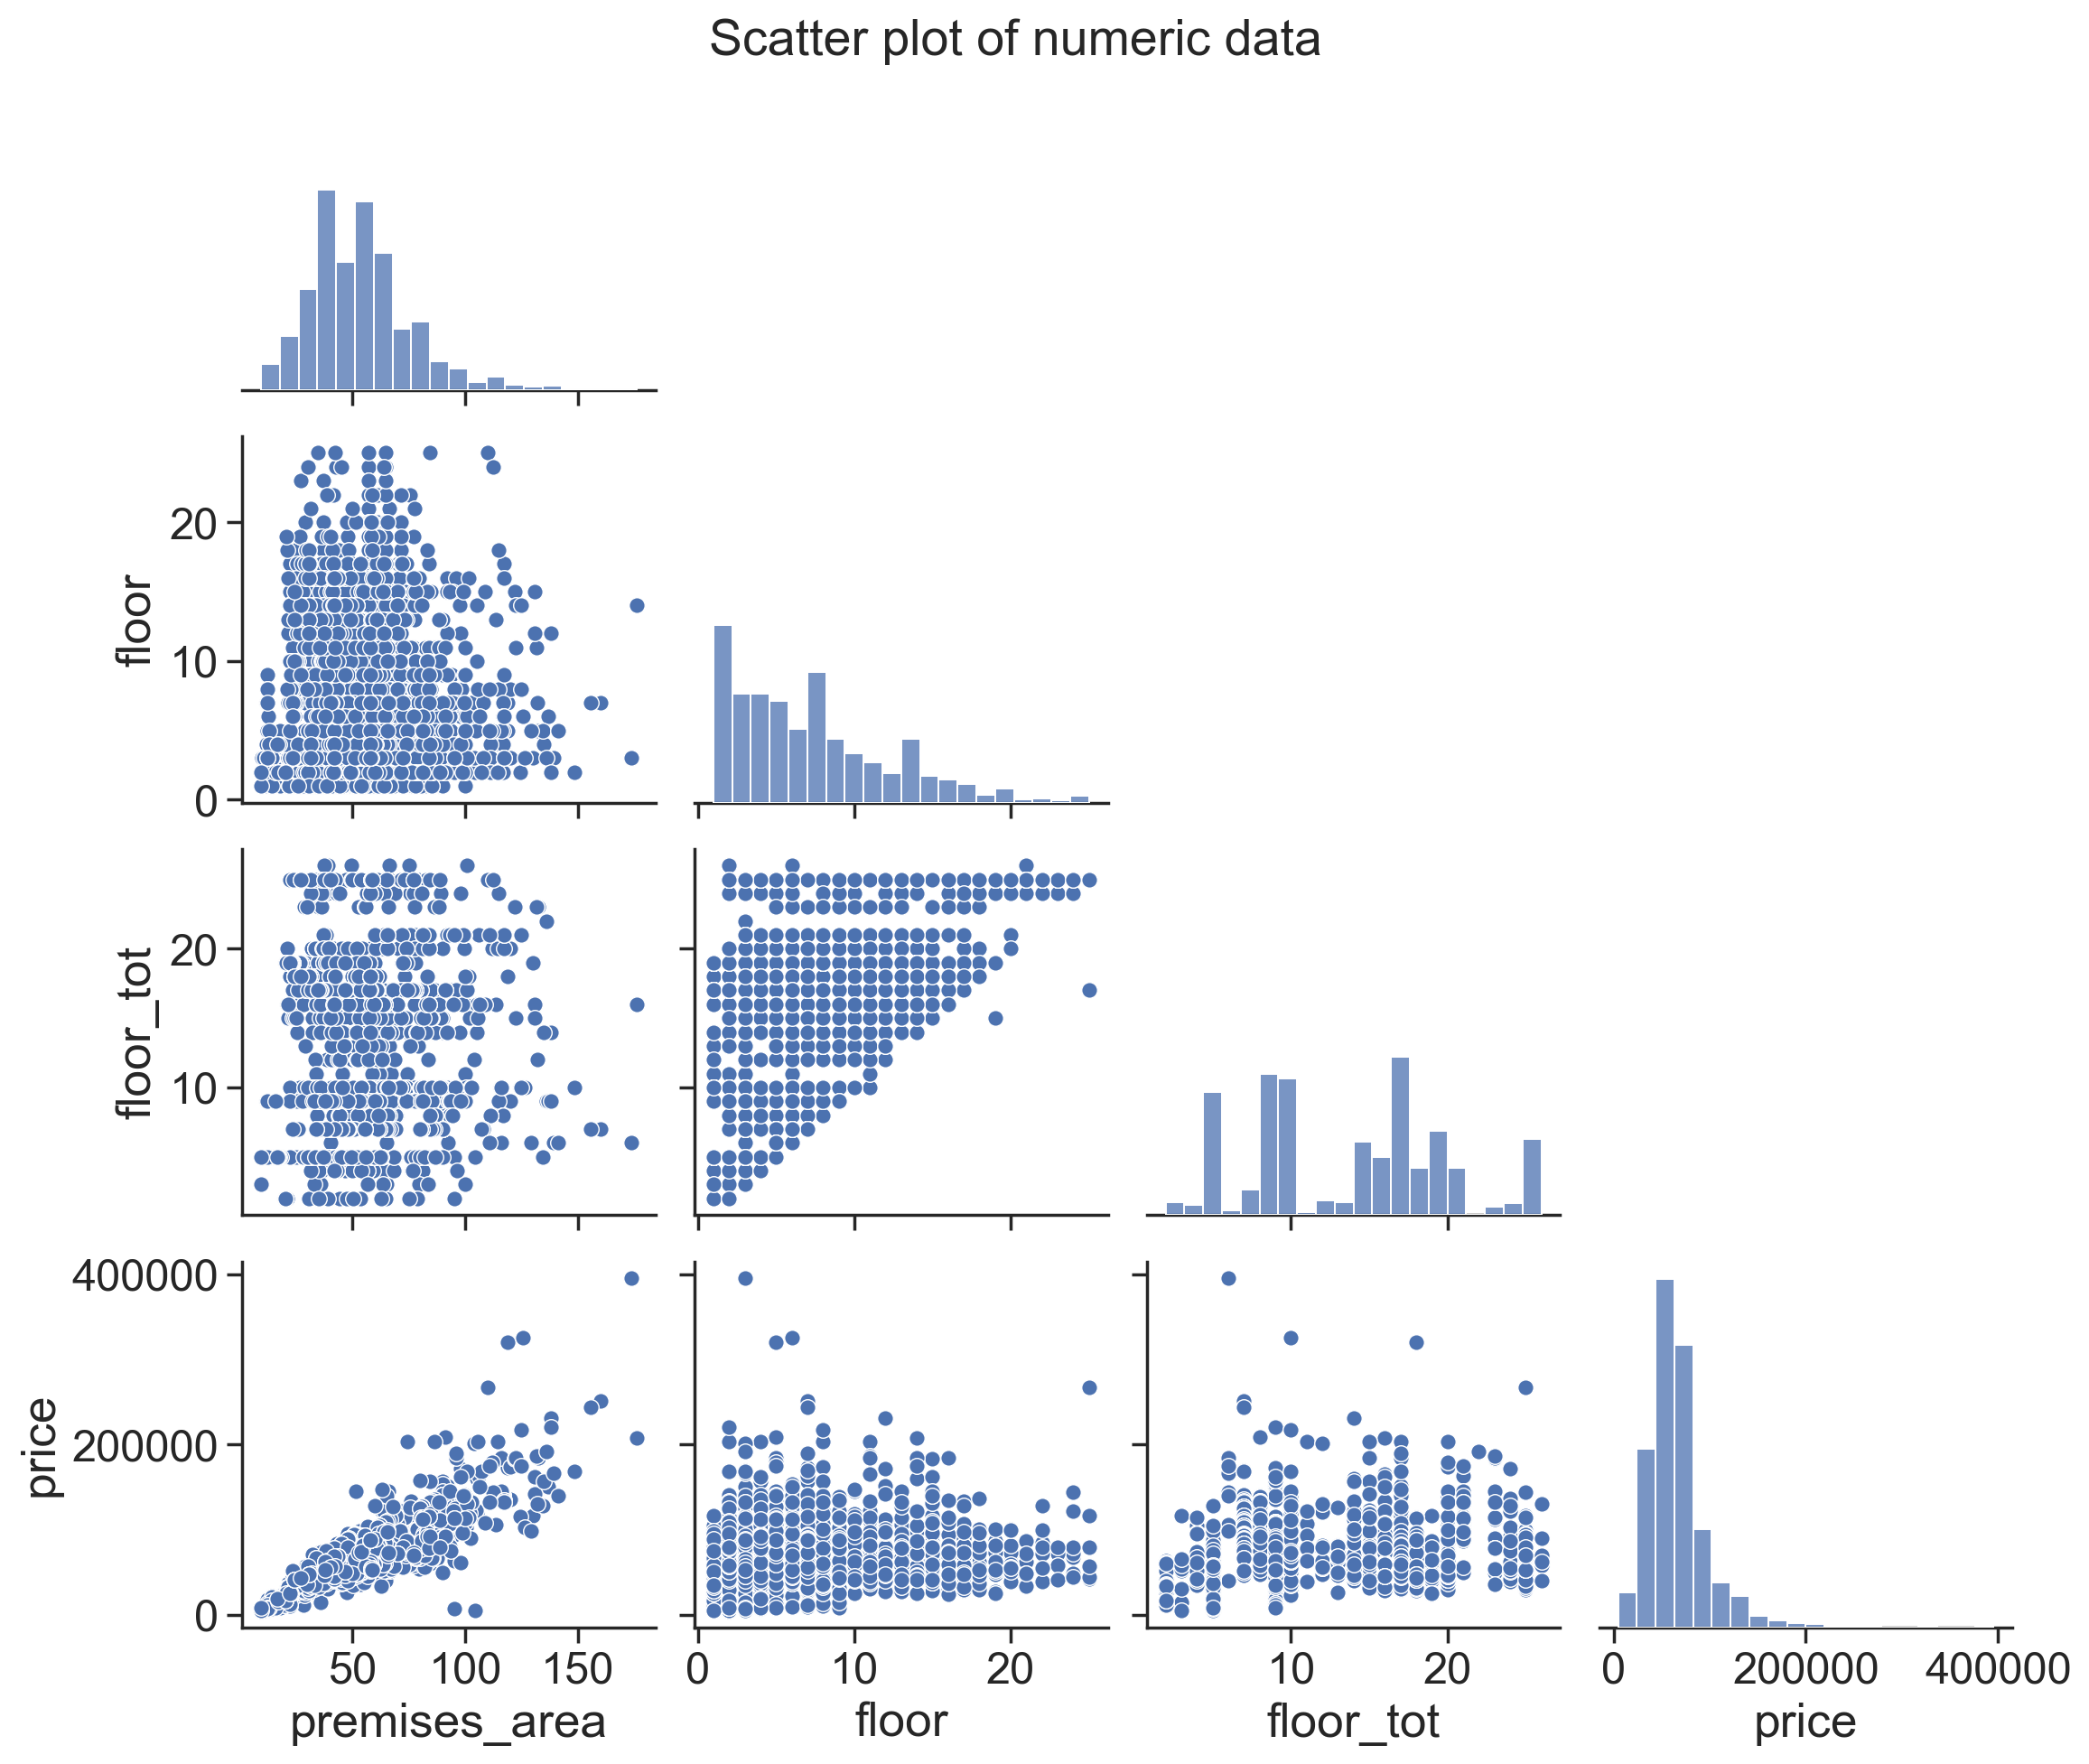

In [6]:
# Scatter plot matrix of numerical data
df_scatter = sns.set(rc={"figure.dpi":200})
df_scatter = sns.set(font_scale=1.6)
df_scatter = sns.set_style("ticks")
df_scatter = sns.pairplot(df, vars=df._get_numeric_data(), \
                          diag_kind = 'hist', corner='True', palette='colorblind', \
                          plot_kws={"s": 40}, diag_kws={'bins':20}, aspect=15/13)
df_scatter.fig.suptitle("Scatter plot of numeric data", fontsize=20)
plt.show()

- The pairplot displays pairwise relationships between premises_area, floor,	floor_tot and price, and includes histograms along the diagonal to show the distribution of each variable. <br>
- The scatter plot floor_tot vs floor has some data lower diagonal. This indicates that there are two rows in our dataframe where floor > floor_tot. This information should be cleared.<br>
- The price compared to the premises_area has suspicious data in the lower part of about 100 m2. This is definitely too low a price for such a flat aria. It should be cleared also.<br>
- One can see clear linear dependence of price vs premises area. <br>
- The price is distributed mainly up to 200k. Therefore, we need to know data outliers by price.

## 3. Data Preparation <a id="5"></a>

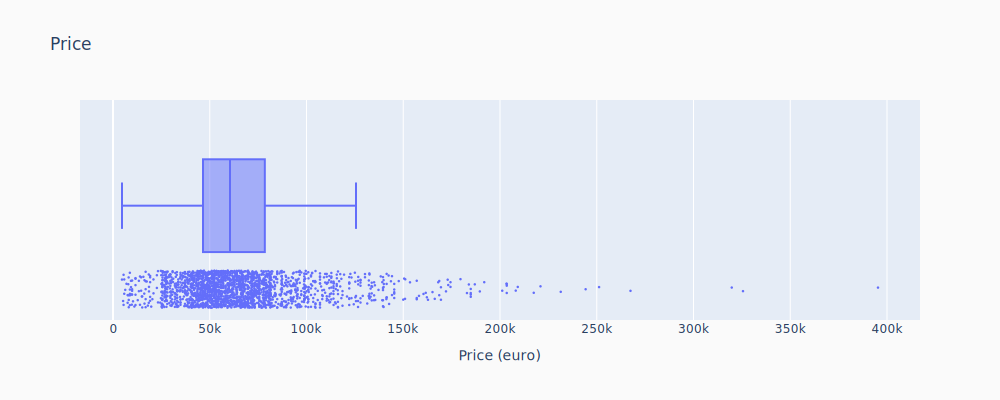

In [7]:
# Box plot to check price outliers
fig = go.Figure(data=[go.Box(x=df.price,
            boxpoints='all',
            jitter=0.4, # separation between points
            pointpos=-1.8, # relative position of points wrt box  
            marker_size=2.5, hovertemplate='Value: %{y:.2f}'
              )] )

fig.update_yaxes(visible=False)
fig.update_xaxes(title_text="Price (euro)")
fig.update_layout(paper_bgcolor='#fafafa', width=1000,  height=400, title='Price')

fig.show(renderer="svg")

The box plot displays the distribution of prices and any potential outliers, which are displayed as individual points. Median around 60k, min = 4.6k, max = 123k. Let's label data over 150k as outliers and not use it for further research.

In [8]:
# Delete price outliers data 
df = df[df.price < 150000]

In [9]:
# Find suspicious data (price compared to the premises_area)
df_outliers = df[(df.price < 15000) & (df.premises_area > 80)]
df_outliers

,flat_type,city_area,premises_area,floor,floor_tot,layout,status,price
739,sectional_ap,Kirovsky,104.4,2,5,section,finished,5465.116279
914,sectional_ap,Kirovsky,95.1,4,5,section,finished,6976.744186


In [10]:
# Delete suspicious data
df = df.drop(df_outliers.index)

In [11]:
# Took only floor <= total floors
df = df[df.floor <= df.floor_tot]

In [12]:
# Count of unique values in the "flat_type" for getting an idea of the distribution of different types of 
# apartments in the dataset
df.flat_type.value_counts()

2_room_ap       784
1_room_ap       762
3_room_ap       423
4_room_ap       116
gostinka_ap      23
room             23
sectional_ap     17
5_room_ap         3
Name: flat_type, dtype: int64

In [13]:
# Count of unique values in the "city_area"
df.city_area.value_counts()

Sovietskiy           744
Oktyabrskiy          393
Sverdlovsky          306
Leninsky             240
Zheleznodorozhniy    206
Kirovsky             139
Central              123
Name: city_area, dtype: int64

In [14]:
# Count of unique values in the "layout"
df.layout.value_counts()

new             1458
studio           239
individual       127
khrushchevka      99
improved          99
stalinka          32
leningradka       27
gostinka          23
dorm_room         23
section           17
2-level            4
room_in_flat       3
Name: layout, dtype: int64

In [15]:
# Merge several groups: 'room_in_flat' and 'section'  into 'section' / '2-level', 'individual' into 'individual'. 
df['layout'] = df['layout'].apply(lambda x: x.replace('room_in_flat','section'))
df['layout'] = df['layout'].apply(lambda x: x.replace('2-level','individual'))

In [16]:
# Count of unique values in the "status"
df.status.value_counts()

finished              1518
under_construction     633
Name: status, dtype: int64

The data is well distributed and ready for further analysis.

## 4. Feature Understanding and Feature Relationships <a id="6"></a>

### A. Correlation between premises_area, floor, floor_tot, price <a id="7"></a>

The code below creates a heatmap to visualize the correlation between numeric variables in the DataFrame

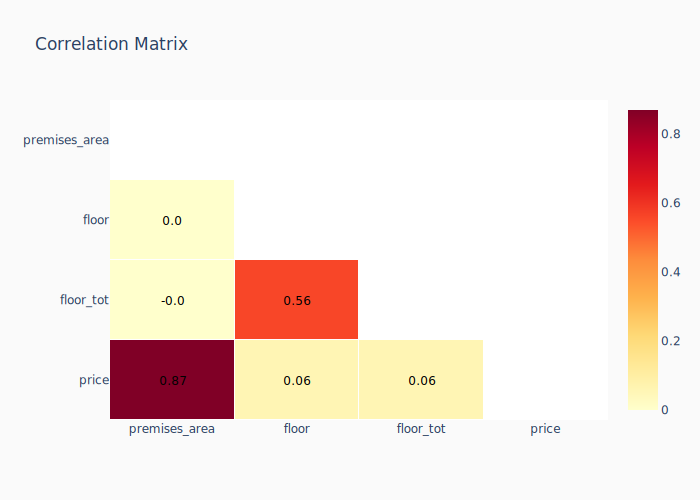

In [17]:
# Checking the correlation between numerical values
corr = df._get_numeric_data().corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)
font_colors = ['#1f77b4','black'] 
fig = ff.create_annotated_heatmap(z=df_mask.to_numpy().round(2), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.sequential.YlOrRd,#YlGnBu,
                                  showscale=True, ygap=1, xgap=1,
                                  font_colors=font_colors
                                 )
fig.update_xaxes(side="bottom")
fig.update_layout(
    title='Correlation Matrix', 
    xaxis_showgrid=False, yaxis_showgrid=False,
    xaxis_zeroline=False, yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white',
    paper_bgcolor='#fafafa'
)
# Get rid of the NaN values from text 
for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show(renderer="svg")

- The premises area has a big positive correlation with a price what of course coincide with previous scatter plot. <br>
- The floor of the apartment and the total floor of the building have almost no effect on the price.

### B. Flat type <a id="8"></a>

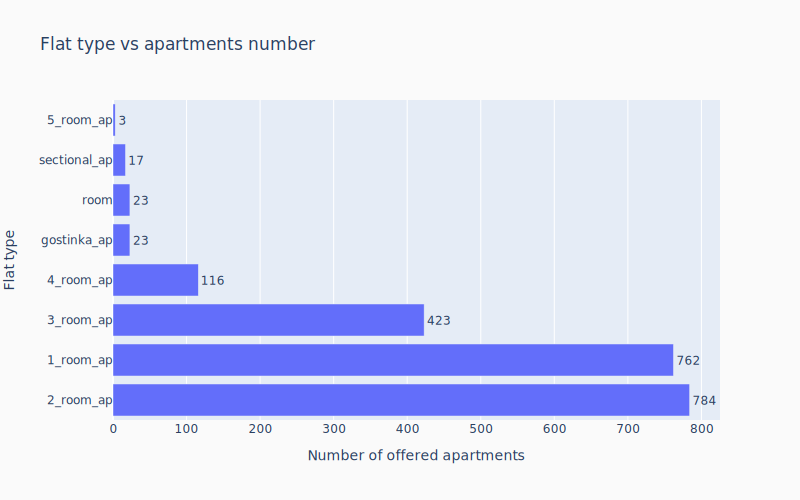

In [18]:
# Bar chart to display the number of apartments offered for each flat type 
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.flat_type.value_counts(), y=df.flat_type.value_counts().index, orientation='h', texttemplate="%{x}", textfont_size=12, textposition = 'outside'))
fig.update_layout(paper_bgcolor='#fafafa', width=800,  height=500, title='Flat type vs apartments number')
fig.update_xaxes(title_text="Number of offered apartments")
fig.update_yaxes(title_text="Flat type")

fig.show(renderer="svg")

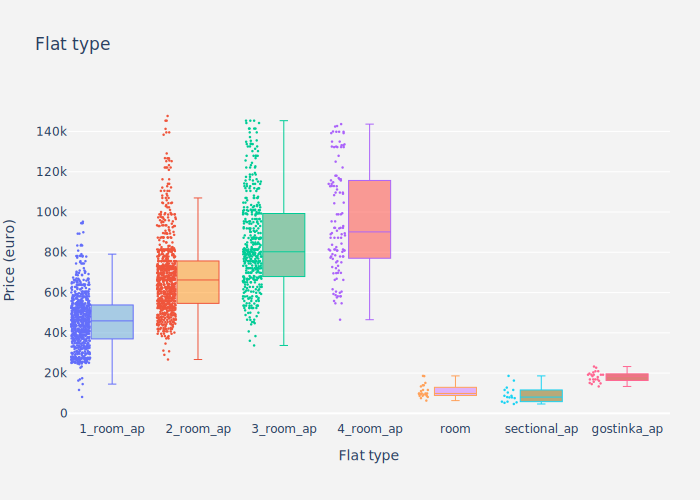

In [19]:
# Box plot for the price distribution the most common flat types
x_data = ['1_room_ap', '2_room_ap', '3_room_ap', '4_room_ap', 'room', 'sectional_ap', 'gostinka_ap']

y0 = df.price[df.flat_type == '1_room_ap'].values.tolist()
y1 = df.price[df.flat_type == '2_room_ap'].values.tolist()
y2 = df.price[df.flat_type == '3_room_ap'].values.tolist()
y3 = df.price[df.flat_type == '4_room_ap'].values.tolist()
#y4 = df.price[df.flat_type == '5_room_ap'].values.tolist()
y5 = df.price[df.flat_type == 'room'].values.tolist()
y6 = df.price[df.flat_type == 'sectional_ap'].values.tolist()
y7 = df.price[df.flat_type == 'gostinka_ap'].values.tolist()

y_data = [y0, y1, y2, y3, y5, y6, y7]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(207, 11, 2, 0.5)', 'rgba(127, 96, 8, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.45,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2.5,
            line_width=1)
        )

fig.update_layout(
    title='Flat type',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        #dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_yaxes(title_text="Price (euro)")
fig.update_xaxes(title_text="Flat type")

fig.show(renderer="svg")

In [20]:
# Average premises area for different flat types
df.groupby('flat_type')['premises_area'].agg(['mean', 'std']).reset_index()

,flat_type,mean,std
0,1_room_ap,35.360381,7.506436
1,2_room_ap,54.958737,9.477963
2,3_room_ap,72.168676,13.612968
3,4_room_ap,89.866121,17.677148
4,5_room_ap,110.866667,26.451906
5,gostinka_ap,15.691304,1.995430
6,room,12.182609,2.035961
7,sectional_ap,15.200000,5.126036


Analyzing the results of the two previous graphs, some conclusions can be drawn:
- 1- and 2-room apartments significantly outnumber others on the market.
- General trend is visible with an increase in the number of rooms, the cost of housing increases. Prices for rooms, sectional apartments, gostinka apartments are the cheapest due to the fact that there is the smallest area of the premises. 
- As can be seen from the box-plot, the spread of prices with an increase in the housing area tend to be higher.


### C. City area <a id="9"></a>

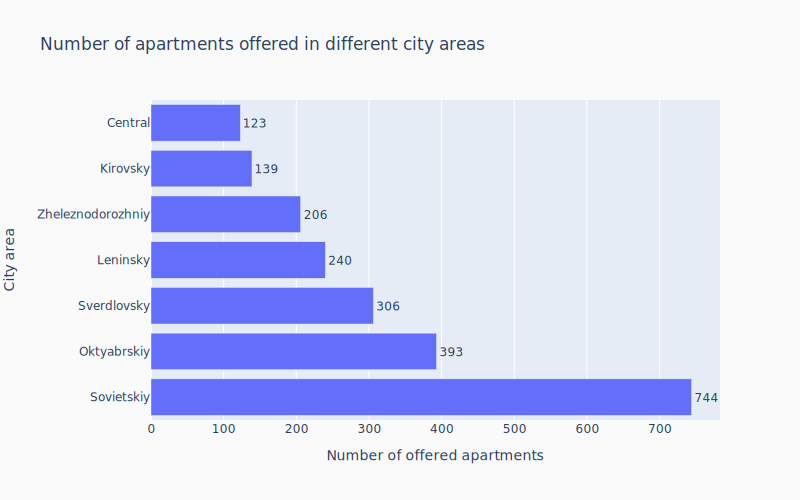

In [21]:
# Bar chart to display the number of apartments offered for each city area
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.city_area.value_counts(), y=df.city_area.value_counts().index, orientation='h', texttemplate="%{x}", textfont_size=12, textposition = 'outside'))
fig.update_layout(paper_bgcolor='#fafafa', width=800,  height=500, title='Number of apartments offered in different city areas')
fig.update_xaxes(title_text="Number of offered apartments")
fig.update_yaxes(title_text="City area")

fig.show(renderer="svg")

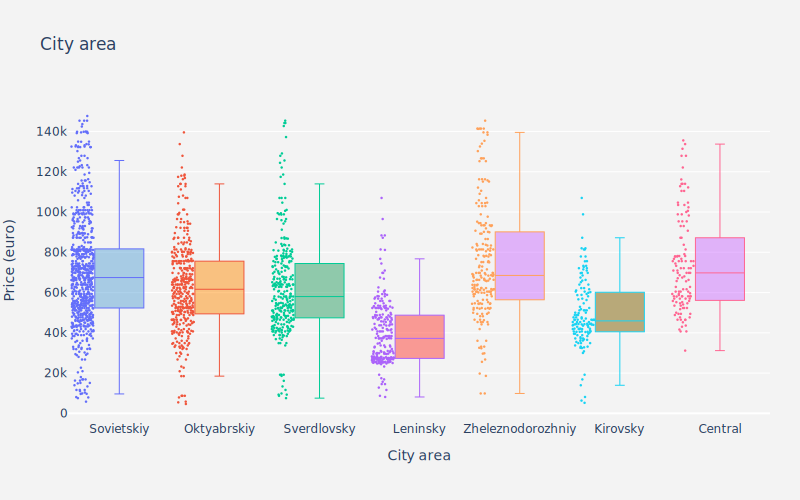

In [22]:
# Box plot for the price distribution of the apartments in different districts of the city
x_data = df.city_area.value_counts().index.tolist()

y0 = df.price[df.city_area == 'Sovietskiy'].values.tolist()
y1 = df.price[df.city_area == 'Oktyabrskiy'].values.tolist()
y2 = df.price[df.city_area == 'Sverdlovsky'].values.tolist()
y3 = df.price[df.city_area == 'Leninsky'].values.tolist()
y4 = df.price[df.city_area == 'Zheleznodorozhniy'].values.tolist()
y5 = df.price[df.city_area == 'Kirovsky'].values.tolist()
y6 = df.price[df.city_area == 'Central'].values.tolist()

y_data = [y0, y1, y2, y3, y4, y5, y6]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(207, 114, 255, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.45,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2.5,
            line_width=1)
        )

fig.update_layout(width=800,  height=500,
    title='City area',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        #dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_yaxes(title_text="Price (euro)")
fig.update_xaxes(title_text="City area")

fig.show(renderer="svg")

- There are significantly more apartments in the Sovietsky district than in others on the market. The smallest number of offered apartments is located in the "Central" district.
- The cheapest apartments are located in the "Leninsky" and "Kirovsky" districts.

### D. Premises area <a id="10"></a>

To investigate premises area let's create a scatter plot. Where the x-axis shows the premises area and the y-axis shows the price of the apartments. The marginal_x and marginal_y parameters add histograms to each axis. And the color of each point is determined by the flat type.

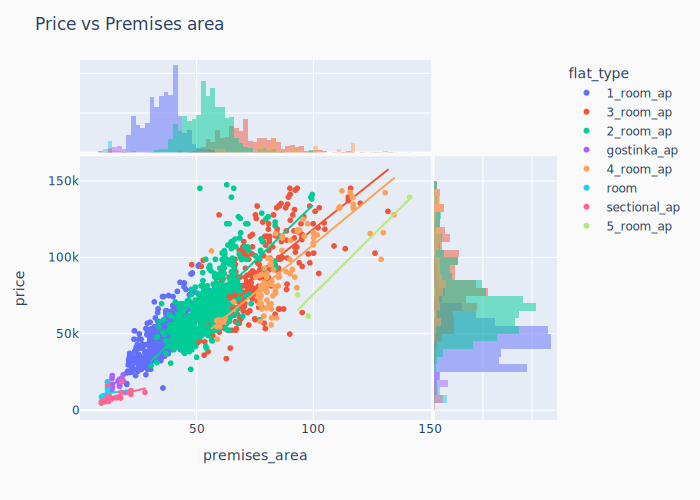

In [23]:
# Scatter plot
fig = px.scatter(df, x=df["premises_area"], y=df["price"], marginal_x="histogram", marginal_y="histogram", 
                 color="flat_type", trendline="ols")
fig.update_layout(paper_bgcolor='#fafafa', title='Price vs Premises area')

fig.show(renderer="svg")

- From the graph it can be seen that the prices for apartments are highly dependent on their type, which are marked with colors. These price and area distributions are very clearly visible on the density plots.
- The trend lines show that the price increases linearly with an increase in the area of housing for different categories of apartments. The slope of the trend lines shows that rooms and sectional apartments rise in price much less with an increase in area than other types of apartments.

### E. Floor <a id="11"></a>

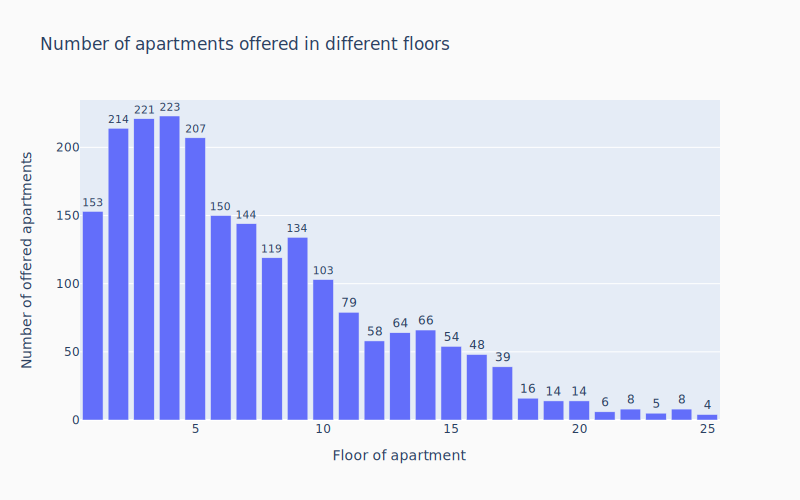

In [24]:
# Bar chart to display the number of apartments offered in different floors
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.floor.value_counts().index, y=df.floor.value_counts(), texttemplate="%{y}", textfont_size=12, textposition = 'outside'))
fig.update_layout(paper_bgcolor='#fafafa', width=800,  height=500, title='Number of apartments offered in different floors')
fig.update_xaxes(title_text="Floor of apartment")
fig.update_yaxes(title_text="Number of offered apartments")

fig.show(renderer="svg")

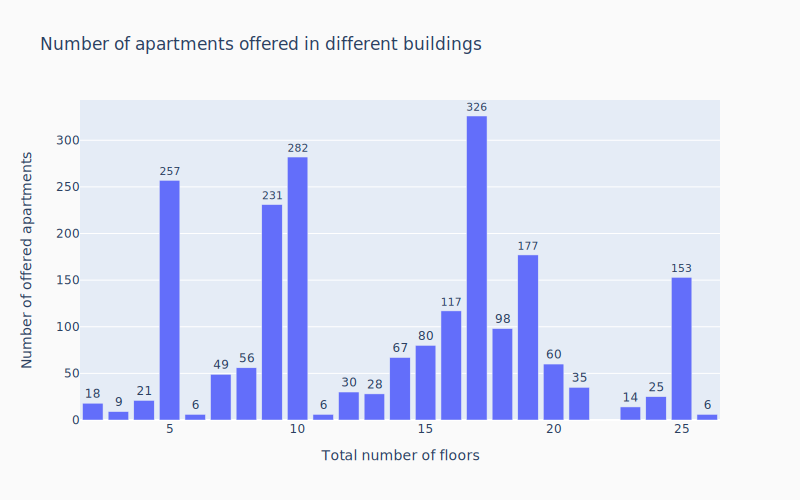

In [25]:
# Bar chart to display the number of apartments offered in buildings with different total floor numbers
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.floor_tot.value_counts().index, y=df.floor_tot.value_counts(), texttemplate="%{y}", textfont_size=12, textposition = 'outside'))
fig.update_layout(paper_bgcolor='#fafafa', width=800,  height=500, title='Number of apartments offered in different buildings')
fig.update_xaxes(title_text="Total number of floors")
fig.update_yaxes(title_text="Number of offered apartments")

fig.show(renderer="svg")

- A general trend is visible that starting from the first floor, the increase in the floor decreases the total number of the offered apartments.
- The largest number of offers for the sale of apartments is in buildings with a total number of storeys of 5, 9, 10, 17, 19, 25 floors.

### F. Layout <a id="12"></a>

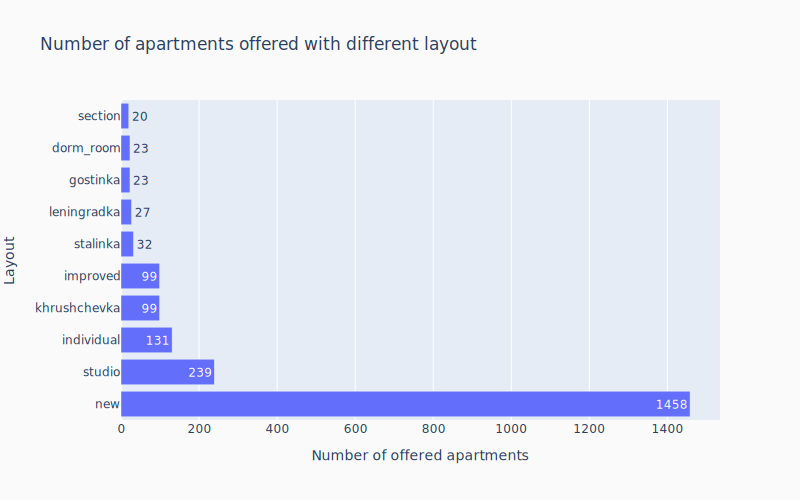

In [26]:
# Bar chart to display the number of apartments offered with different layout
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.layout.value_counts(), y=df.layout.value_counts().index, orientation='h', texttemplate="%{x}", textfont_size=12))
fig.update_layout(paper_bgcolor='#fafafa', width=800,  height=500, title='Number of apartments offered with different layout')
fig.update_xaxes(title_text="Number of offered apartments")
fig.update_yaxes(title_text="Layout")

fig.show(renderer="svg")

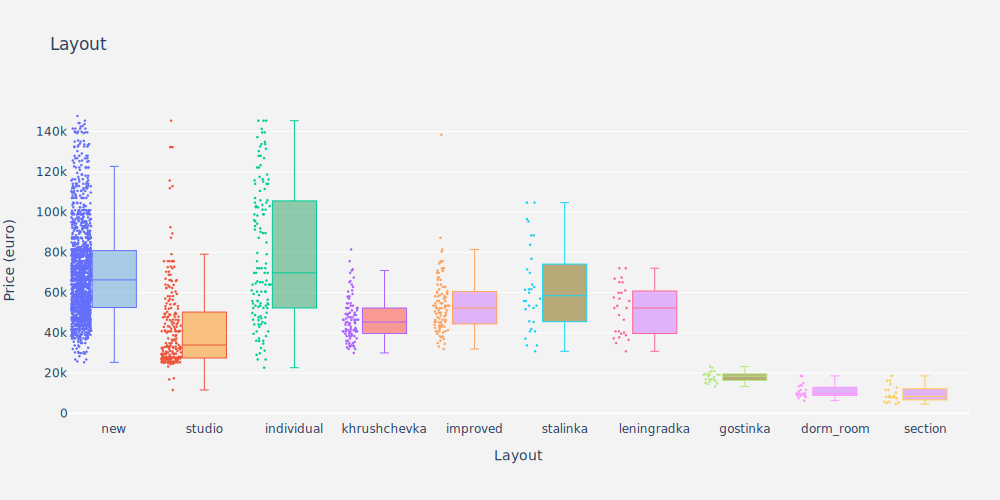

In [27]:
# Box plot for the price distribution of the apartments with different layout
x_data = df.layout.value_counts().index.tolist()

y0 = df.price[df.layout == 'new'].values.tolist()
y1 = df.price[df.layout == 'studio'].values.tolist()
y2 = df.price[df.layout == 'individual'].values.tolist()
y3 = df.price[df.layout == 'khrushchevka'].values.tolist()
y4 = df.price[df.layout == 'improved'].values.tolist()
y5 = df.price[df.layout == 'stalinka'].values.tolist()
y6 = df.price[df.layout == 'leningradka'].values.tolist()
y7 = df.price[df.layout == 'gostinka'].values.tolist()
y8 = df.price[df.layout == 'dorm_room'].values.tolist()
y9 = df.price[df.layout == 'section'].values.tolist()

y_data = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(207, 114, 255, 0.5)', 'rgba(207, 114, 255, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.45,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2.5,
            line_width=1)
        )

fig.update_layout(width=1000,  height=500,
    title='Layout',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        #dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_yaxes(title_text="Price (euro)")
fig.update_xaxes(title_text="Layout")
fig.show(renderer="svg")

In [28]:
# Average premises area for different layout
df.groupby('layout')['premises_area'].agg(['mean', 'std']).reset_index()

,layout,mean,std
0,dorm_room,12.182609,2.035961
1,gostinka,15.691304,1.995430
2,improved,50.511111,13.179498
3,individual,63.279771,25.689645
4,khrushchevka,44.075758,10.027484
5,leningradka,47.733333,13.623594
6,new,56.539122,17.868770
7,section,15.955000,6.666292
8,stalinka,62.593750,16.975484
9,studio,32.955607,15.400883


- Apartments with a "new" layout greatly outnumber others on the market.
- The "gostinka", "dorm_room" and "section" apartments are the cheapest, since their living space is quite small (as can be seen from the table above and the previous analysis).
- The "new", "individual" and "stalinka" types of layouts tend to be more expensive, but they also have a wider price range overall.

### G. Construction status <a id="13"></a>

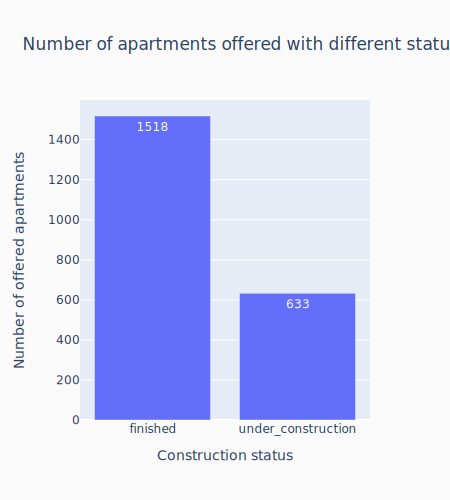

In [29]:
# Bar chart to display the number of apartments offered with finished or under_construction status
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.status.value_counts().index, y=df.status.value_counts(), texttemplate="%{y}", textfont_size=12))
fig.update_layout(paper_bgcolor='#fafafa', width=450,  height=500, title='Number of apartments offered with different status')
fig.update_yaxes(title_text="Number of offered apartments")
fig.update_xaxes(title_text="Construction status")

fig.show(renderer="svg")

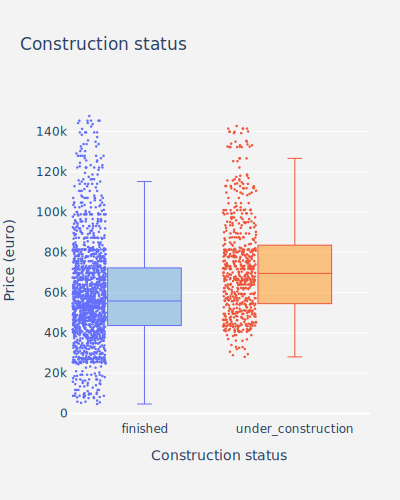

In [30]:
# Box plot for the price distribution of the apartments with different construction status
x_data = df.status.value_counts().index.tolist()

y0 = df.price[df.status == 'finished'].values.tolist()
y1 = df.price[df.status == 'under_construction'].values.tolist()

y_data = [y0, y1]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(207, 114, 255, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.45,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2.5,
            line_width=1)
        )

fig.update_layout(
    width=400,  height=500,
    title='Construction status',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_yaxes(title_text="Price (euro)")
fig.update_xaxes(title_text="Construction status")

fig.show(renderer="svg")

- The number of apartments under construction status, obviously, greatly exceeds the number of apartments that are under construction. 
- Many apartments are being built, almost a third of those that are sold as finished type.

## 5. Apartments under construction <a id="14"></a>
Due to the fact that a huge number of apartments are under construction, let's look at which apartments are in this status and find the most profitable type of housing for the average buyer.

### A. City areas <a id="15"></a>

In [31]:
# Selection of only those apartments that are in the status "under_construction"
uc = df[df.status == 'under_construction']

In [32]:
# Count of unique values in the "city_area"
uc.city_area.value_counts()

Sovietskiy           256
Oktyabrskiy          171
Zheleznodorozhniy    106
Sverdlovsky           67
Kirovsky              33
Name: city_area, dtype: int64

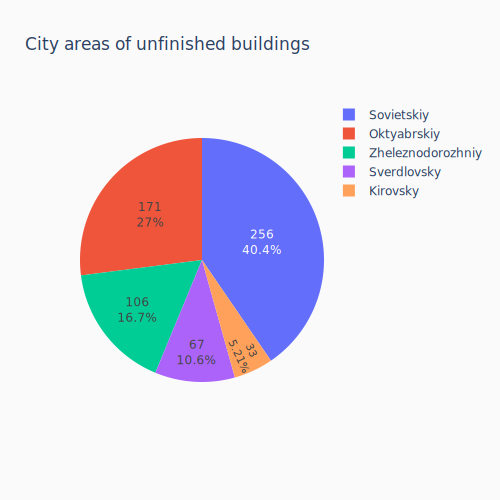

In [33]:
# Let's build a pie chart to demonstrate number of city areas where new flat are building
fig = px.pie(uc.city_area, names="city_area",
            title='City areas of unfinished buildings', width=500,  height=500)
fig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show(renderer="svg")

- Most of the apartments are being built in the Sovietsky and Oktyabrsky districts.

### B. Flat types <a id="16"></a>

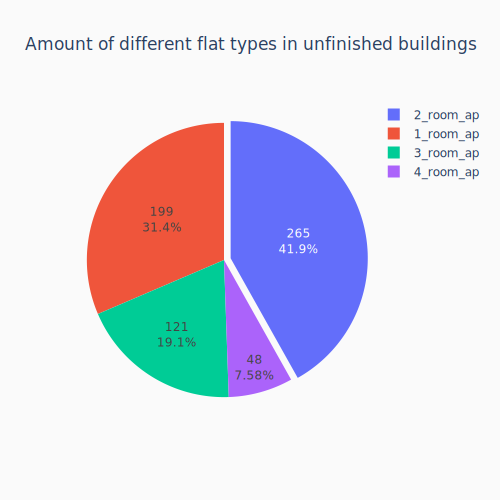

In [34]:
# Let's build a pie chart to demonstrate number of different flat types where new flat are building
fig = px.pie(uc.flat_type, names="flat_type",
            title='Amount of different flat types in unfinished buildings', width=500,  height=500)
fig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
fig.update_traces(textposition='inside', textinfo='percent+value', pull=[0, 0, 0, 0, 0.05])
fig.show(renderer="svg")

In [35]:
# Average prices for different flat_type in under construction building 
uc_flat = uc.groupby('flat_type')['price'].agg(['mean', 'std']).reset_index()

In [36]:
# Average prices for different flat_type in finished building 
finished = df[df.status == 'finished']
finished_flat = finished.groupby('flat_type')['price'].agg(['mean', 'std']).reset_index()
finished_flat = finished_flat[finished_flat.flat_type != '5_room_ap']
finished_flat = finished_flat[finished_flat.flat_type != 'gostinka_ap']
finished_flat = finished_flat[finished_flat.flat_type != 'room']
finished_flat = finished_flat[finished_flat.flat_type != 'sectional_ap']

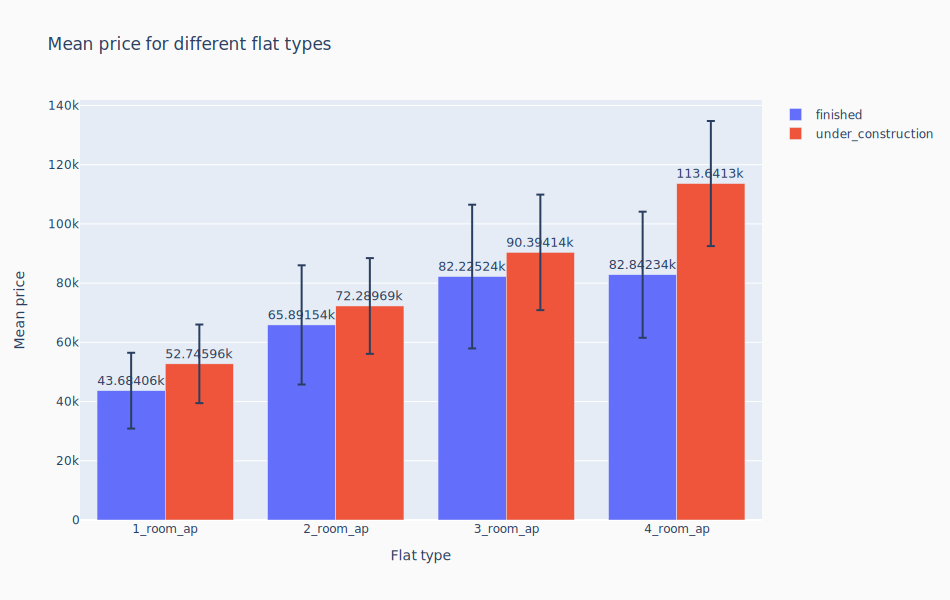

In [37]:
# Average prices for different flat_type 
fig = go.Figure()
fig.add_trace(go.Bar(
    name='finished',
    x=finished_flat.flat_type, y=finished_flat["mean"],
    error_y=dict(type='data', array=finished_flat["std"]), texttemplate="%{y}", textfont_size=14, textposition = 'outside'))
fig.add_trace(go.Bar(
    name='under_construction',
    x=uc_flat.flat_type, y=uc_flat["mean"],
    error_y=dict(type='data', array=uc_flat["std"]), texttemplate="%{y}", textfont_size=14, textposition = 'outside'))
fig.update_layout(paper_bgcolor='#fafafa', barmode='group', width=950,  height=600, title='Mean price for different flat types')
fig.update_yaxes(title_text="Mean price")
fig.update_xaxes(title_text="Flat type")

fig.show(renderer="svg")

- The largest number of apartments under construction are two-room 41.9% with an average price 72.29k euro, in second place are one-room 31.4% with an average price 52.74k euro.
- For apartments in buildings under construction, the mean price increases with an increase in the number of rooms. In the case of finished apartments, the dependence is not so obvious for 3- and 4-room apartments, the average value of the cost is almost the same.

### C. Best prices for 2-room apartment <a id="17"></a>

According to studies [3], 1 and 2-room apartments are the most frequently bought. 
Since two-room apartments are the most popular among developers, we will find the best option in terms of area and price for the average buyer.

In [38]:
# Average premises_area for different flat_type in under construction building 
uc.groupby('flat_type')['premises_area'].agg(['mean', 'std']).reset_index()

,flat_type,mean,std
0,1_room_ap,38.660201,6.362901
1,2_room_ap,57.035094,7.964903
2,3_room_ap,73.497438,10.779029
3,4_room_ap,99.155000,14.765637


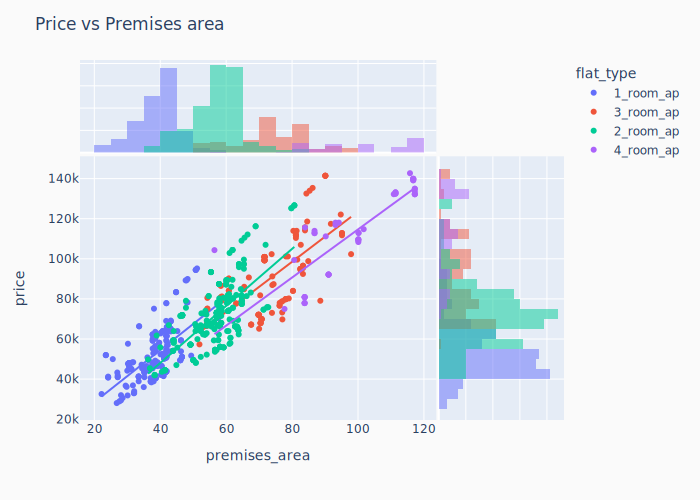

In [39]:
# Scatter plot price vs premises_area. Color of each point is determined by the flat type
fig = px.scatter(uc, x=uc["premises_area"], y=uc["price"], marginal_x="histogram", marginal_y="histogram", 
                 color="flat_type", trendline="ols")
fig.update_layout(paper_bgcolor='#fafafa', title='Price vs Premises area')

fig.show(renderer="svg")

- The histograms of the scatter plot clearly shows the division of prices and areas of apartments of different types. In scatter plot, we are interested in overlapping histograms aria for 1- and 2-room apartments as the most popular among buyers. **Thus we will find two-room apartments with an premises area of at least 50 m2 and not exceeding the average cost of one-room apartments 52745 euro.** 

In [40]:
uc[(uc.price <= 52745) & (uc.premises_area > 50) & (uc.flat_type == '2_room_ap')]

,flat_type,city_area,premises_area,floor,floor_tot,layout,status,price
612,2_room_ap,Sovietskiy,50.80,15,18,new,under_construction,48141.860465
619,2_room_ap,Sovietskiy,50.80,4,18,new,under_construction,48141.860465
871,2_room_ap,Sovietskiy,50.06,7,17,new,under_construction,49453.488372
872,2_room_ap,Sovietskiy,50.06,5,17,new,under_construction,49453.488372
873,2_room_ap,Sovietskiy,50.06,17,17,new,under_construction,49453.488372
874,2_room_ap,Sovietskiy,50.06,12,17,new,under_construction,49453.488372
875,2_room_ap,Sovietskiy,50.06,3,17,new,under_construction,49453.488372
1662,2_room_ap,Oktyabrskiy,54.10,6,16,new,under_construction,52209.302326
1663,2_room_ap,Oktyabrskiy,52.30,4,16,new,under_construction,51081.395349


- We found 9 new two-room apartments for the price of a one-room apartment and much more area than the average one-room case, taking into account the standard deviation. 
Seven of them are located in the Sovietskiy and two in the Oktyabrskiy region. The apartments are located in 17 and 18 storey building on quite different floors.

### D. 2-room apartment price distribution in different city arias<a id="18"></a>
So we have already identified the most profitable and popular apartments, we will further consider the distribution of two-room apartment prices in various districts of the Krasnoyarsk city.

In [41]:
# Average price for different city_area in under construction building
uc_flat_2rooms = uc[uc.flat_type == '2_room_ap'].groupby('city_area')['price'].agg(['mean', 'std']).reset_index()
uc_flat_2rooms

,city_area,mean,std
0,Kirovsky,48295.016611,8396.316866
1,Oktyabrskiy,67664.203709,9028.929669
2,Sovietskiy,72490.703537,12520.579719
3,Sverdlovsky,67364.767442,10747.036463
4,Zheleznodorozhniy,95802.325581,19801.980770


In [42]:
# Count of unique values in the "city_area" for 2_room apartment in under construction building
uc[uc.flat_type == '2_room_ap'].city_area.value_counts()

Sovietskiy           119
Oktyabrskiy           79
Zheleznodorozhniy     33
Sverdlovsky           20
Kirovsky              14
Name: city_area, dtype: int64

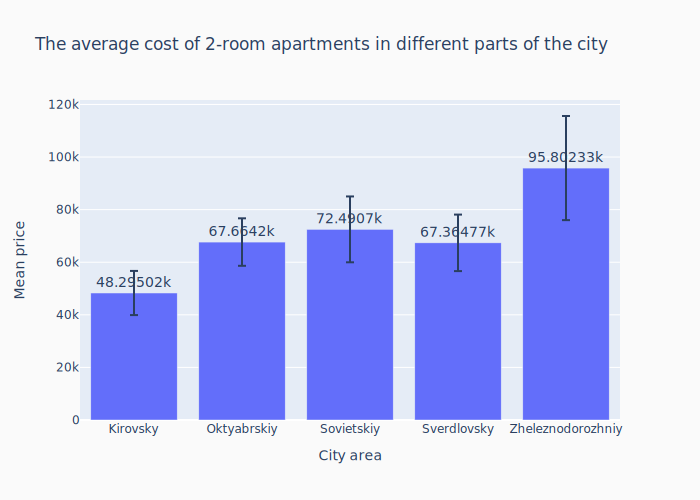

In [43]:
# Average prices of 2_room apartments for different city areas 
fig = go.Figure()
fig.add_trace(go.Bar(
    x=uc_flat_2rooms["city_area"], y=uc_flat_2rooms["mean"],
    error_y=dict(type='data', array=uc_flat_2rooms["std"]), texttemplate="%{y}", textfont_size=14, textposition = 'outside'))
fig.update_layout(paper_bgcolor='#fafafa', barmode='group', width=700,  height=500, title='The average cost of 2-room apartments in different parts of the city')
fig.update_yaxes(title_text="Mean price")
fig.update_xaxes(title_text="City area")

fig.show(renderer="svg")

- Among 2-room apartments in buildings under construction, the cheapest flats are located in the Kirovsky region, and the most expensive in the Zheleznodorozhniy region.
- The prices for the considered apartments in the Oktyabrskiy, Sovietskiy and Sverdlovsky districts do not have a statistically significant difference due to similar mean value and overlap of standard deviation.

In [44]:
# save data to csv
df.to_csv("flats_info_eda.csv", index=False)

## 6. Summary  <a id="19"></a>

The Exploratory Data Analysis (EDA) for the Krasnoyarsk city real estate market provides valuable insights for data scientists and real estate analysts. The analysis covers various factors affecting the price of apartments in the Krasnoyarsk city market, including premises area, flat type, city area, layout, construction status, and floor. The following are some of the key findings from the analysis:

- The EDA found a clear linear relationship between price and premises area, with a big positive correlation between the two. The floor of the apartment and the total floor of the building had almost no effect on the price. One and two-room apartments significantly outnumbered other types of flats on the market, with the general trend of an increase in the number of rooms leading to a higher cost of housing. The cheapest flats were rooms, sectional apartments, and gostinka apartments, which had the smallest area of premises.

- The city area also played a significant role in the housing market, with significantly more apartments in the Sovietsky district than others. The smallest number of apartments was located in the Central district, and the cheapest ones were in the Leninsky and Kirovsky districts.

- The EDA also revealed that the type of layout significantly affected the price of apartments. Apartments with a "new" layout greatly outnumbered others on the market, with "gostinka", "dorm_room", and "section" apartments being the cheapest, while "new", "individual", and "stalinka" types tended to be more expensive.

- Moreover, the analysis found that a large number of apartments were under construction status, with two-room apartments being the most popular among developers. The average price of a two-room apartment was found to be 72.29k euro.

- The EDA also identified the most profitable and popular two-room apartments with a premises area of at least 50 m2 and not exceeding the average cost of one-room apartments 52.74k euro. These apartments were found to be located in the Sovietskiy and Oktyabrskiy regions.

- On average, the lowest price for 2-room apartments under construction are located in the Kirovsky region, and the most expensive are located in the Zheleznodorozhniy region. The prices for the considered apartments in the Oktyabrskiy, Sovietskiy, and Sverdlovsky districts do not have a statistically significant difference due to similar mean value and overlap of standard deviation.

Overall, the EDA provides valuable insights for buyers, sellers, developers, and investors looking to invest in the Krasnoyarsk city housing market.

## 7. References <a id="20"></a>  
1) https://arevera.ru/apartments/ <br>
2) https://lidenz.com/typical-russian-apartments/ <br>
3) https://www.metrinfo.ru/novostroyki/articles/samye-populyarnye-kvartiry-udobnye-no-bez.165447.html